#**TUGAS PRAKTIKUM MANDIRI 04 - MACHINE LEARNING**

Nama : Imelda Wahyuni

Nim : 0110222042

Sesi : Pagi

#**Logistic Regression**

#**INFORMASI DATASET**

Dataset Calon Pembeli Mobil berisi informasi mengenai beberapa individu yang menjadi calon pembeli mobil. Setiap baris pada dataset merepresentasikan satu calon pembeli dengan sejumlah atribut yang menggambarkan kondisi demografis dan ekonominya. Adapun nama serta makna dari setiap kolom dalam dataset ini adalah sebagai berikut:

•	ID → Nomor identitas atau penanda unik untuk setiap calon pembeli.

•	Usia → Umur calon pembeli (dalam tahun).

•	Status → Status sosial atau kategori pekerjaan calon pembeli (dinyatakan dalam kode numerik).

•	Kelamin → Jenis kelamin calon pembeli, dengan 0 = Perempuan dan 1 = Laki-laki.

•	Memiliki_Mobil → Jumlah mobil yang sudah dimiliki calon pembeli.

•	Penghasilan → Besar pendapatan calon pembeli.

•	Beli_Mobil → Variabel target yang menunjukkan apakah calon pembeli membeli mobil (1) atau tidak (0).

Dataset ini digunakan untuk membangun model Logistic Regression guna memprediksi keputusan pembelian mobil berdasarkan faktor-faktor tersebut.


**1. Import Library**

Tahap pertama melakukan import libary, guna untuk mempermudah proses membuat sebuah model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

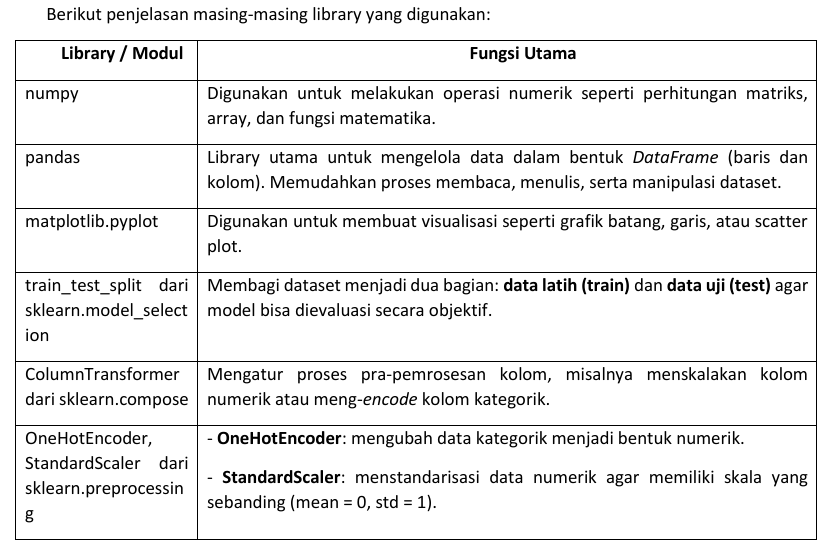

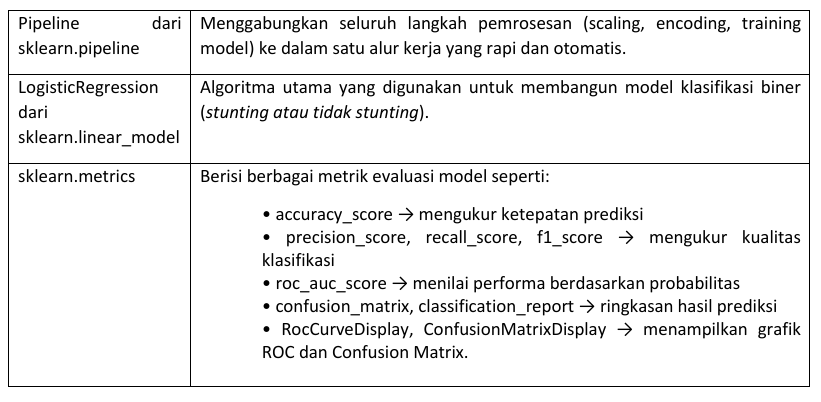

**2. Menghubungkan Colab dengan Drive**

Kode di bawah ini untuk menghubungkan colab dengan drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Memanggil path folder yang akan digunakan

In [ ]:
path = "/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum04/data/calonpembelimobil.csv"

**3. Load data dan membaca file csv**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file calonpembelimobil.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum04/data/calonpembelimobil.csv")
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


**4. Melihat informasi umum dataset**

Kode df info ini untuk melihat informasi yang ada pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


Terdapat 3 type data dari 5 kolom, floast (2), int (1) dan object (3)

**5. Data Pre-processing**

Tahap selanjutnya yaitu melakukan data pre-processing yaitu pembersihan data, muladi dari mengecek apakah ada data yang hilang, duplikat data, mengecek nilai unik, sampai mapping kolom kategorik ke bentuk numerik dan menganalisis korelasi antar variabel numerik hingga visualisasi heatmap korelasi matriks.

**5.1 Cek Missing Value**

Kode di bawah ini adalah mengecekan missing value, apakah terdapat nilai yang kotor atau tidak.

In [ ]:
# cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


Terlihat ya pada hasil di atas, bahwa tidak ada nilai yang hilang, kotor ataupun yang lainnya. Dataset calon pembeli mobil ini sudah bersih.

Kode di bawah ini yaitu untuk mengecek apakah ada duplikat data

In [ ]:
# Mengecek apakah ada duplikat data
df.duplicated().sum()

np.int64(0)

Dari hasil cek duplikat di atas, tidak terdapat nilai duplikat.

**5.2 Pemisahan Data dan Jenis Kolom**

Kode ini tujuannya buat memisahkan data mana yang mau dipakai untuk prediksi, dan mana yang jadi targetnya.

In [ ]:
# Contoh: jika kolom target bernama 'Beli_Mobil' (0 = Tidak Beli, 1 = Beli)
# Pastikan nama kolom sesuai dengan file kamu
X = df.drop(columns=["Beli_Mobil"])
y = df["Beli_Mobil"]

# Identifikasi kolom numerik & kategorik
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("\nKolom Numerik:", list(numeric_features))
print("Kolom Kategorik:", list(categorical_features))



Kolom Numerik: ['ID', 'Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
Kolom Kategorik: []


**5.3 Analisis Korelasi Antar Variabel Numerik**

Fungsi corr() digunakan untuk menghitung korelasi Pearson antara setiap variabel numerik terhadap
target.

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


Dari hasil korelasi di atas, bisa disimpulkan bahwa:

* Variabel dengan pengaruh paling kuat terhadap keputusan membeli mobil adalah Penghasilan (0.7639).

* Variabel lain seperti Usia, Status, dan Memiliki_Mobil hanya punya pengaruh kecil.

* Kelamin menunjukkan hubungan negatif lemah, artinya jenis kelamin bukan faktor utama.

**5.4 Visualisasi Heatmap Korelasi**

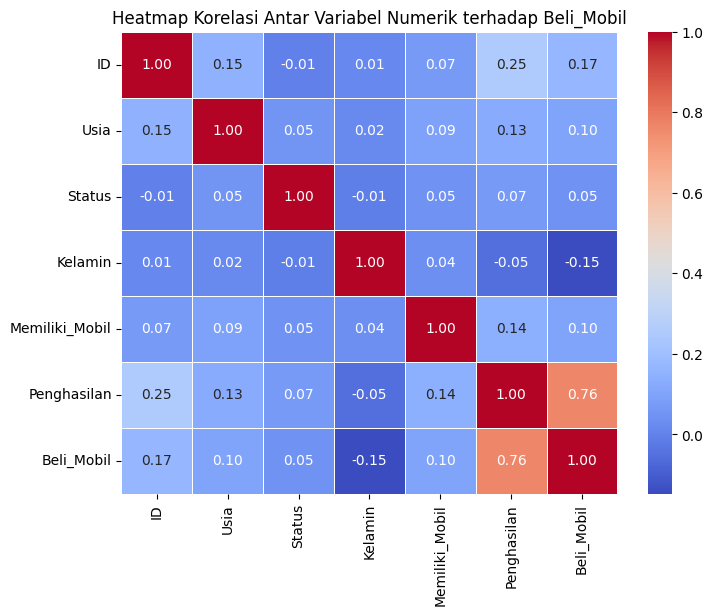

In [ ]:
# Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap Beli_Mobil', fontsize=12)
plt.show()

Hasil visualisasi heatmap korelasi menunjukkan bahwa variabel Penghasilan memiliki hubungan positif paling kuat dengan variabel Beli_Mobil (nilai korelasi 0.76). Artinya, semakin tinggi penghasilan seseorang, semakin besar kemungkinan mereka membeli mobil. Sementara itu, variabel Usia, Status, dan Memiliki_Mobil memiliki korelasi positif lemah, sehingga pengaruhnya kecil terhadap keputusan pembelian mobil. Sedangkan variabel Kelamin menunjukkan korelasi negatif lemah (-0.15), menandakan bahwa jenis kelamin tidak berpengaruh signifikan. Secara umum, faktor penghasilan menjadi variabel yang paling berpengaruh terhadap keputusan membeli mobil.

**6. Pembagian Dataset (Training dan Testing)**

Sebelum model dilatih, dataset harus dibagi menjadi dua bagian utama, yaitu:

• Data Latih (Training Set) — digunakan untuk melatih model agar dapat mengenali pola pada data.

• Data Uji (Testing Set) — digunakan untuk mengukur kemampuan generalisasi model terhadap data baru yang belum pernah dilihat.

**6.1 Membagi Dataset menjadi Training dan Testing Set**

Kode ini digunakan untuk membagi data menjadi dua bagian, yaitu data untuk pelatihan (training) dan data untuk pengujian (testing).

In [ ]:
# 80% data untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nUkuran Data Training:", X_train.shape)
print("Ukuran Data Testing:", X_test.shape)



Ukuran Data Training: (800, 6)
Ukuran Data Testing: (200, 6)


Hasil dari output di atas :
* Dataset dibagi menjadi 800 baris untuk data training dan 200 baris untuk data testing.
* Masing-masing memiliki 6 kolom fitur.
Dengan pembagian ini, model nantinya akan belajar dari 800 data pertama dan diuji menggunakan 200 data sisanya untuk mengevaluasi kinerjanya.

**7. Pembangunan Model Logistic Refression**

Kode ini digunakan untuk membangun dan melatih model prediksi menggunakan algoritma Logistic Regression. Logistic Regression cocok digunakan untuk klasifikasi biner, yaitu ketika target hanya memiliki dua kelas, misalnya “Beli Mobil (1)” dan “Tidak Beli Mobil (0)”.

In [ ]:
# Pipeline: gabungkan preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Latih model
model.fit(X_train, y_train)
print("✅nModel Logistic Regression telah dilatih!")

✅nModel Logistic Regression telah dilatih!


Proses pelatihan telah berhasil dilakukan, dan sekarang model sudah siap digunakan untuk melakukan prediksi pada data uji (X_test).

**8. Prediksi Model dan Evaluasi Model**

Setelah model Logistic Regression selesai dilatih, langkah selanjutnya adalah menggunakan model tersebut untuk melakukan prediksi pada data uji, kemudian mengukur seberapa baik kinerja modelnya menggunakan beberapa metrik evaluasi.

In [ ]:
# Prediksi data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrik evaluasi
print("\n=== Hasil Evaluasi Model ===")
print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi   : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_proba):.4f}")



=== Hasil Evaluasi Model ===
Akurasi   : 0.9300
Presisi   : 0.9829
Recall    : 0.9055
F1-Score  : 0.9426
ROC-AUC   : 0.9768


Dari hasil di atas dapat disimpulkan:

* Akurasi 0.93 (93%) → model mampu memprediksi dengan benar sebagian besar data uji.

* Presisi 0.98 → dari semua orang yang diprediksi akan membeli mobil, 98% benar-benar membeli.

* Recall 0.90 → model berhasil menemukan sekitar 90% dari semua orang yang benar-benar membeli mobil.

* F1-Score 0.94 → menunjukkan keseimbangan yang baik antara presisi dan recall.

* ROC-AUC 0.97 → menandakan model memiliki kemampuan sangat baik dalam membedakan antara pembeli dan non-pembeli.

**Confusion Matrix**

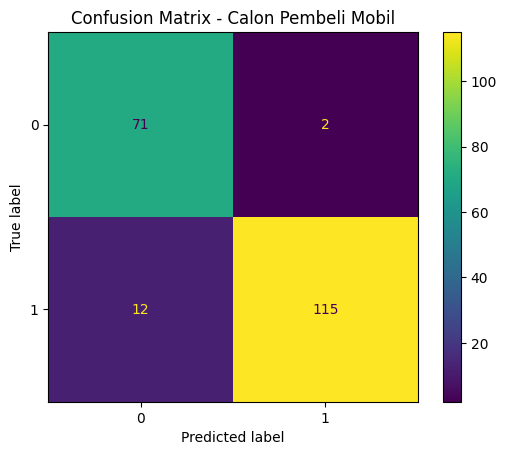

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Calon Pembeli Mobil")
plt.show()

Gambar tersebut menampilkan Confusion Matrix dari model Logistic Regression untuk kasus prediksi calon pembeli mobil. Matriks ini memperlihatkan kinerja model dalam membedakan antara dua kelas (0 = tidak membeli, 1 = membeli).

Dari hasilnya:

* 71 data (True Negative): model berhasil memprediksi dengan benar bahwa pelanggan tidak membeli mobil.

* 115 data (True Positive): model juga benar dalam memprediksi pelanggan yang membeli mobil.

* 2 data (False Positive): model salah memprediksi pelanggan tidak membeli sebagai membeli.

* 12 data (False Negative): model salah memprediksi pelanggan membeli sebagai tidak membeli.

Secara keseluruhan, model menunjukkan performa yang sangat baik, karena sebagian besar prediksi berada pada diagonal utama (71 dan 115), menandakan tingkat kesalahan yang rendah dalam klasifikasi.

**Kurva  ROC**

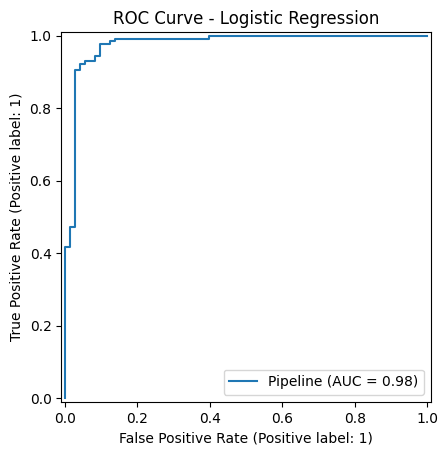

In [ ]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

Gambar di atas menunjukkan kurva ROC (Receiver Operating Characteristic) dari model Logistic Regression. Kurva ini dipakai untuk melihat seberapa baik model bisa membedakan antara orang yang membeli mobil dan yang tidak membeli mobil. Sumbu vertikal menunjukkan seberapa banyak prediksi benar untuk pembeli mobil (true positive), sedangkan sumbu horizontal menunjukkan seberapa sering model salah menebak orang yang sebenarnya tidak beli tapi diprediksi beli (false positive).

Dari grafiknya terlihat garis ROC berada dekat dengan sudut kiri atas, artinya model bekerja dengan sangat baik. Nilai AUC = 0.98 juga menandakan model punya kemampuan tinggi dalam membedakan kedua kelompok tersebut. Jadi, bisa dibilang model Logistic Regression ini sangat akurat dan bisa memprediksi calon pembeli mobil dengan hasil yang memuaskan.

**9. Classification Report**

In [ ]:
# classification report
from sklearn.metrics import classification_report

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Tidak Beli", "Beli"]))


=== Classification Report ===
              precision    recall  f1-score   support

  Tidak Beli       0.86      0.97      0.91        73
        Beli       0.98      0.91      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.94      0.93      0.93       200



Hasil di atas menampilkan Classification Report yang digunakan untuk mengevaluasi kinerja model Logistic Regression secara lebih detail. Dalam laporan ini terdapat beberapa metrik utama, yaitu precision, recall, dan f1-score untuk masing-masing kelas (“Tidak Beli” dan “Beli”).

Nilai precision menunjukkan seberapa banyak prediksi “Beli” yang benar-benar tepat, sedangkan recall menunjukkan seberapa banyak data “Beli” yang berhasil dikenali oleh model. F1-score adalah gabungan dari precision dan recall, sehingga memberikan ukuran kinerja yang lebih seimbang.

Dari hasilnya, kelas “Tidak Beli” memiliki precision 0.86 dan recall 0.97, artinya model sangat baik dalam mengenali orang yang tidak membeli mobil. Sedangkan kelas “Beli” memiliki precision 0.98 dan recall 0.91, menunjukkan bahwa model juga sangat akurat dalam memprediksi calon pembeli mobil. Nilai akurasi keseluruhan 0.93 (93%) memperkuat bahwa model Logistic Regression ini sudah bekerja dengan sangat baik dalam membedakan antara pembeli dan non-pembeli.

**10. Classification Report**

In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(model, X, y, cv=5)

# Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.75  0.91  0.955 0.945 0.94 ]
Rata-rata akurasi: 0.9
Standar deviasi: 0.07648529270389176


Hasil di atas menunjukkan proses cross-validation yang digunakan untuk menguji kestabilan dan keandalan model Logistic Regression. Dengan menggunakan 5-fold cross-validation, data dibagi menjadi 5 bagian — di mana setiap bagian bergantian digunakan sebagai data uji, sedangkan sisanya sebagai data latih.

Dari hasilnya, diperoleh skor akurasi untuk tiap fold sebesar [0.75, 0.91, 0.955, 0.945, 0.94], dengan rata-rata akurasi 0.9 (atau 90%). Ini menunjukkan bahwa model memiliki performa yang konsisten dan cukup tinggi pada sebagian besar pembagian data. Nilai standar deviasi 0.076 berarti variasi antar-fold tergolong kecil, sehingga model tidak terlalu bergantung pada data tertentu. Dengan kata lain, model Logistic Regression ini cukup stabil dan mampu melakukan generalisasi dengan baik terhadap data baru.

**11. Interprestasi Model Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd

feature_names = model.named_steps['preprocessor'].get_feature_names_out(X.columns)
coefs = model.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({
    'Fitur': feature_names,
    'Koefisien': coefs,
    'Odds Ratio': np.exp(coefs)
}).sort_values(by='Koefisien', ascending=False)

display(coef_df)

,Fitur,Koefisien,Odds Ratio
5,num__Penghasilan,4.567965,96.347803
4,num__Memiliki_Mobil,0.079346,1.082579
0,num__ID,-0.005476,0.994539
1,num__Usia,-0.044000,0.956954
2,num__Status,-0.132433,0.875961
3,num__Kelamin,-0.597947,0.549940


Hasil interpretasi model Logistic Regression menunjukkan bahwa penghasilan memiliki pengaruh paling besar terhadap keputusan membeli mobil, dengan koefisien 4.57 dan odds ratio 96.35, artinya semakin tinggi penghasilan seseorang, peluang membeli mobil meningkat sangat signifikan. Fitur memiliki mobil juga berpengaruh positif namun kecil, sedangkan usia, status, dan kelamin memiliki pengaruh negatif, yang berarti semakin tinggi nilainya, kemungkinan membeli mobil justru menurun. Jadi, faktor penghasilan menjadi penentu utama dalam keputusan pembelian mobil berdasarkan model ini.

12. Prediksi Data Baru

In [ ]:
# ==========================================
# Contoh Studi Kasus - Prediksi Pembelian Mobil
# ==========================================

# Buat data baru (contoh 3 calon pembeli)
data_baru = pd.DataFrame({
    'ID': [0, 0, 0], # Add placeholder for ID
    'Usia': [28, 45, 35],              # usia dalam tahun
    'Status': [1, 3, 2],               # status (kode 1,2,3 sesuai dataset)
    'Kelamin': [0, 1, 0],              # 0 = perempuan, 1 = laki-laki
    'Memiliki_Mobil': [0, 2, 1],       # status kepemilikan mobil
    'Penghasilan': [150, 90, 230]      # dalam satuan yang sama seperti dataset
})

# Prediksi menggunakan model Logistic Regression
pred = model.predict(data_baru)
prob = model.predict_proba(data_baru)[:, 1]  # probabilitas beli mobil (kelas 1)

# Gabungkan hasil
hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred (0=Tidak, 1=Ya)'] = pred

display(hasil)

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_Beli_Mobil,"Pred (0=Tidak, 1=Ya)"
0,0,28,1,0,0,150,0.035130,0
1,0,45,3,1,2,90,0.000546,0
2,0,35,2,0,1,230,0.622180,1


Berdasarkan hasil prediksi model Logistic Regression, setiap calon pembeli memiliki peluang berbeda dalam melakukan pembelian mobil. Calon pembeli pertama (usia 28 tahun, belum memiliki mobil, penghasilan 150) memiliki probabilitas 3,5%, sehingga diprediksi tidak membeli mobil. Calon pembeli kedua (usia 45 tahun, sudah memiliki dua mobil, penghasilan 90) juga memiliki probabilitas sangat rendah yaitu 0,05%, sehingga tidak membeli mobil. Sementara calon pembeli ketiga (usia 35 tahun, memiliki satu mobil, penghasilan 230) memiliki probabilitas tertinggi yaitu 62,2%, sehingga diprediksi akan membeli mobil. Hasil ini menunjukkan bahwa semakin tinggi penghasilan dan semakin sedikit mobil yang dimiliki, semakin besar peluang seseorang membeli mobil baru.